In [1]:
import pandas as pd
import numpy as np
from matplotlib import dates as dates, patches as mpatches, pyplot as plt
import seaborn as sns
from plotly import plotly as py, graph_objs  as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Genreal Overview
The purpose of this project is to examine and explore how the sales of video games differ across the world. I am also interested in exploring what role reviews and critics play in the global sales of video games and trying to answer some rumors that I hear about publishers of games. Do publishers bribe reviwers for good reviews? 

### Dataset Description
The dataset I am using is a combination of two other ones. One is data from Vgchartz of video games and their sales from 1985 to 2016 and the other comes from data scraped from the Metacritic website for each game in the first dataset.

## Tables of Contents

### 1. Data Preperation
### 2. Global Sales from different Perspectives
    A. Sales by Platform
    B. Sales by Age Rating
    C. Sales by Genre and Region
### 3. Correlations of User Score vs. Critic Scores
    A. Correlations of each top publisher
    B. Scatter plot of the most and least correlated.
### 4. Sales of Games Overtime.
    A. Average Global Sales over time

### Data Preperation

### Read Data

In [2]:
df_sales = pd.read_csv('vgsales.csv')

### Remove Null Values

In [3]:
df_sales = df_sales.dropna()

### Convert User Score to numeric type

In [4]:
df_sales.User_Score=pd.to_numeric(df_sales.User_Score)

In [5]:
df_sales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


### Question 1: How do global sales differ by rating?

Text(0.5,0,'Platform')

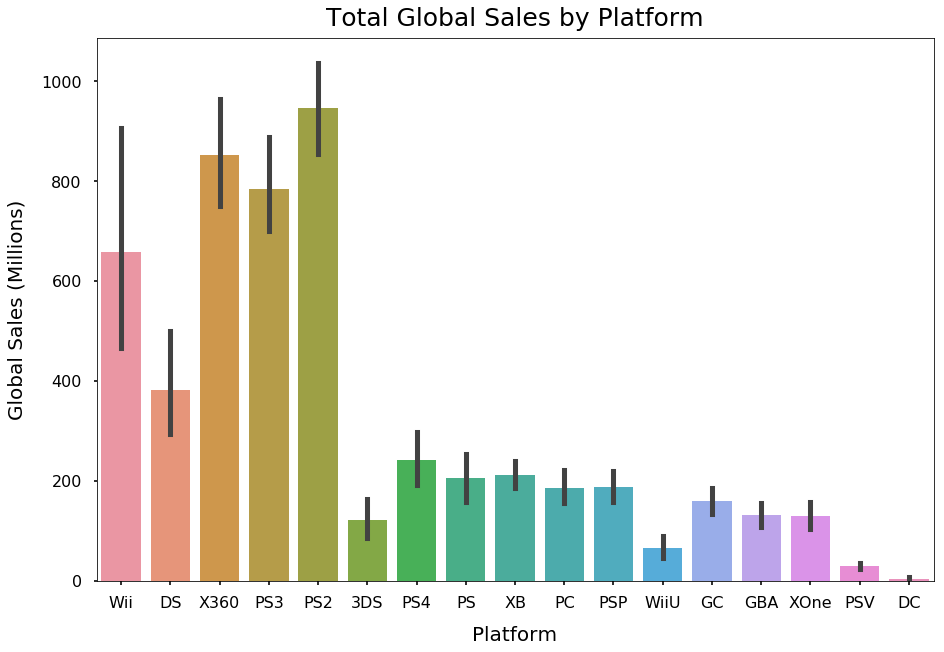

In [6]:
sns.set_context('poster')
fig, ax=plt.subplots(figsize=[15,10])
df_sales.sort_values(by='Global_Sales', ascending=False)
sns.barplot(x = 'Platform', y = 'Global_Sales', data = df_sales, estimator=sum,)
plt.title("Total Global Sales by Platform", fontsize=25, y=1.01)
plt.ylabel("Global Sales (Millions)", fontsize=20, labelpad=15)
plt.xlabel("Platform", fontsize=20, labelpad=15)

## Insights
1. The PS2 has the most sales out of any platform.
1. Older generations of platforms have greater sales.


Text(0.5,0,'Rating')

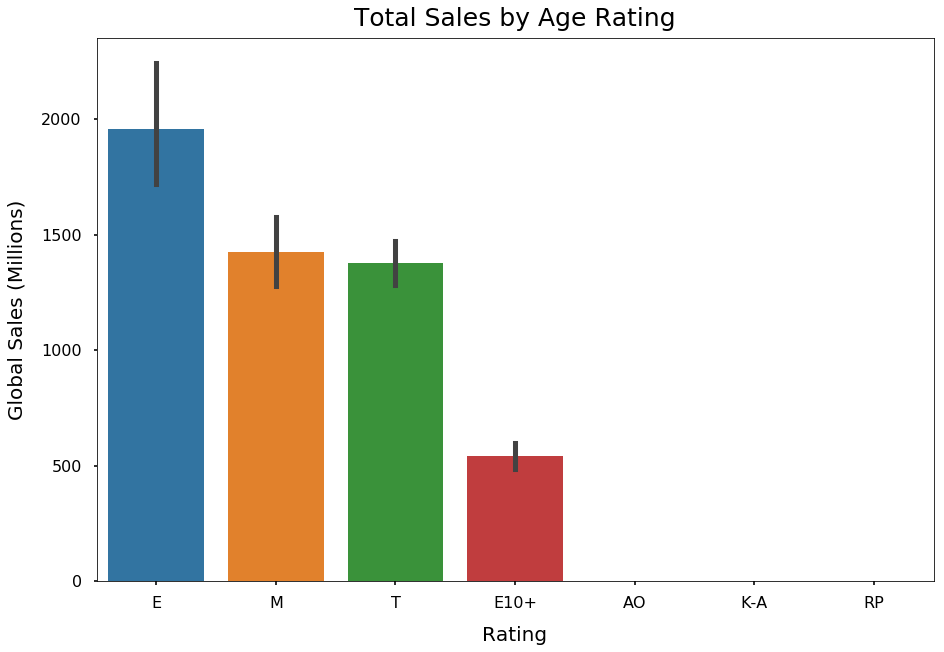

In [7]:
sns.set_context('poster')
fig, ax=plt.subplots(figsize=[15,10])
df_sales.sort_values(by='Global_Sales', ascending=False, inplace=True)

sns.barplot(x = 'Rating', y = 'Global_Sales', data = df_sales, estimator=sum)
plt.title("Total Sales by Age Rating", fontsize=25, y=1.01)
plt.ylabel("Global Sales (Millions)", fontsize=20, labelpad=15)
plt.xlabel("Rating", fontsize=20, labelpad=15)

## Insights
1. Games rated for every one has the greatest amount of sales.
    A. Games rated for everyone 10 and up actually have the least sales.
1. Mature games have slightly greater sales when compared to games rated for teens.

## Question 2: What genres are prefered by each region and what genres are prefered at a global level?

In [8]:
genre= pd.pivot_table(df_sales,index='Genre', aggfunc='mean')
genre.reset_index(level=0, inplace=True)
genre.sort_values(by='Global_Sales', ascending=False, inplace=True)
trace1 = go.Bar(
    x=genre['Genre'],
    y=genre['NA_Sales'],
    name='North America'
)
trace2 = go.Bar(
    x=genre['Genre'],
    y=genre['EU_Sales'],
    name='Europe'
)
trace3 = go.Bar(
    x=genre['Genre'],
    y=genre['JP_Sales'],
    name='Japan'
)
trace4 = go.Bar(
    x=genre['Genre'],
    y=genre['Other_Sales'],
    name='Other'
)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(title = 'Average Sales per Region by Genre',
              xaxis = dict(title = 'Genre'),
              yaxis = dict(title = 'Global Sales (Millions)'),
              width=999,
              height=500,
              barmode='stack'
              )
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

In [9]:
genre= pd.pivot_table(df_sales,index='Genre', aggfunc='sum')
genre.reset_index(level=0, inplace=True)
genre.sort_values(by='Global_Sales', ascending=False, inplace=True)
trace1 = go.Bar(
    x=genre['Genre'],
    y=genre['NA_Sales'],
    name='North America'
)
trace2 = go.Bar(
    x=genre['Genre'],
    y=genre['EU_Sales'],
    name='Europe'
)
trace3 = go.Bar(
    x=genre['Genre'],
    y=genre['JP_Sales'],
    name='Japan'
)
trace4 = go.Bar(
    x=genre['Genre'],
    y=genre['Other_Sales'],
    name='Other'
)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(title = 'Total Sales per Region by Genre',
              xaxis = dict(title = 'Genre'),
              yaxis = dict(title = 'Global Sales (Millions)'),
              width=999,
              height=500,
              barmode='stack'
              )
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

## Insights
1. On average North America makes up most sales for games with Europe comming in second with other regions and Japan last, depending on the genre.
    1. Japan makes up a significantly greater portion of role-playing and puzzle game sales on average. But they also make up a low amount of sales for shooter and strategy games.
    1. Adventure and strategy games have much lower global sales on average than compared to the other genres
    1. Shooters, platforming, and sports games have the most sales on the average.<br><br>
1. However, when looking at total sales action games sell the most in total. But are not high in average sales. So there seem to be alot more action games being made but not selling as well as shooters on average.
    1. Platform games also have high sales on average but low total sales. This may indicate that there are few platforming games but they sell well. 

### Create a table of correlations for each genre.

In [10]:
genre=df_sales.groupby('Genre')['Critic_Count','Critic_Score', 'Global_Sales', 'User_Count', 'User_Score'].corr()

### Unindex the genre names

In [11]:
genre.reset_index(level=[0,1],inplace=True)

### Select the global sales only. 

In [12]:
genre=genre[(genre['level_1']=='Global_Sales')]
genre.drop(['level_1', 'Global_Sales'], axis=1, inplace=True)


In [13]:
genre.set_index('Genre', inplace=True)


## Question 3: How are the Global Sales of different Genres affected by Critics' Scores, Users' Scores, and Popularity

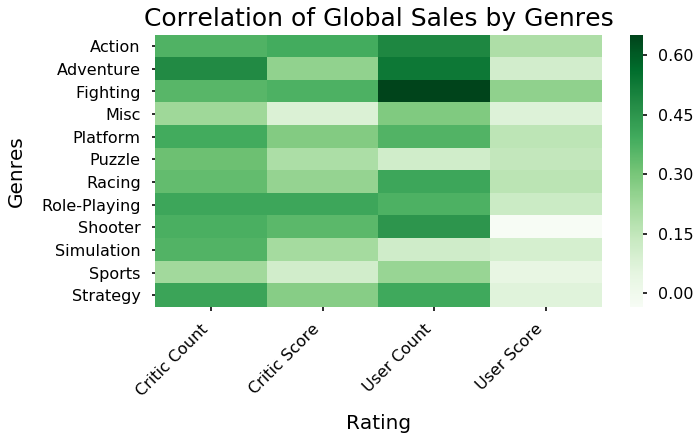

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(genre, yticklabels=True, cmap='Greens')
plt.title("Correlation of Global Sales by Genres", fontsize=25, y=1.01)
plt.ylabel("Genres", fontsize=20, labelpad=15)
plt.xlabel("Rating", fontsize=20, labelpad=15)
ax.set_xticklabels(['Critic Count', 'Critic Score', 'User Count', 'User Score'], rotation='45', ha='right');

## Insights
1. For most genres the number of user or critic reviews is more highly correlated to global sales than the actual review scores.
    1. This seems to reveal that the quality of a game is not as an important factor as popularity. I am using the count of critics and users as a proxy for the popularity and amount of exposure a game has. 
    1. For fighting games this observaition is especially pronounced. The correlation between user count and sales is extremely high, where as the correlation between user reviews and sales is low.
    
1. For the role-playing genre however, the effect is not as obvious at least when looking only at critics. The correlation for this genre is near equal. 

### Create a pivot table on Publishers to get the Publishers with most global sales.

In [15]:
publisher=pd.pivot_table(df_sales,index='Publisher').sort_values(by='Global_Sales', ascending=False).head(10)

## Question 4: What are the top 10 publishers in terms of global sales.

Text(0.5,0,'Global Sales (Millions)')

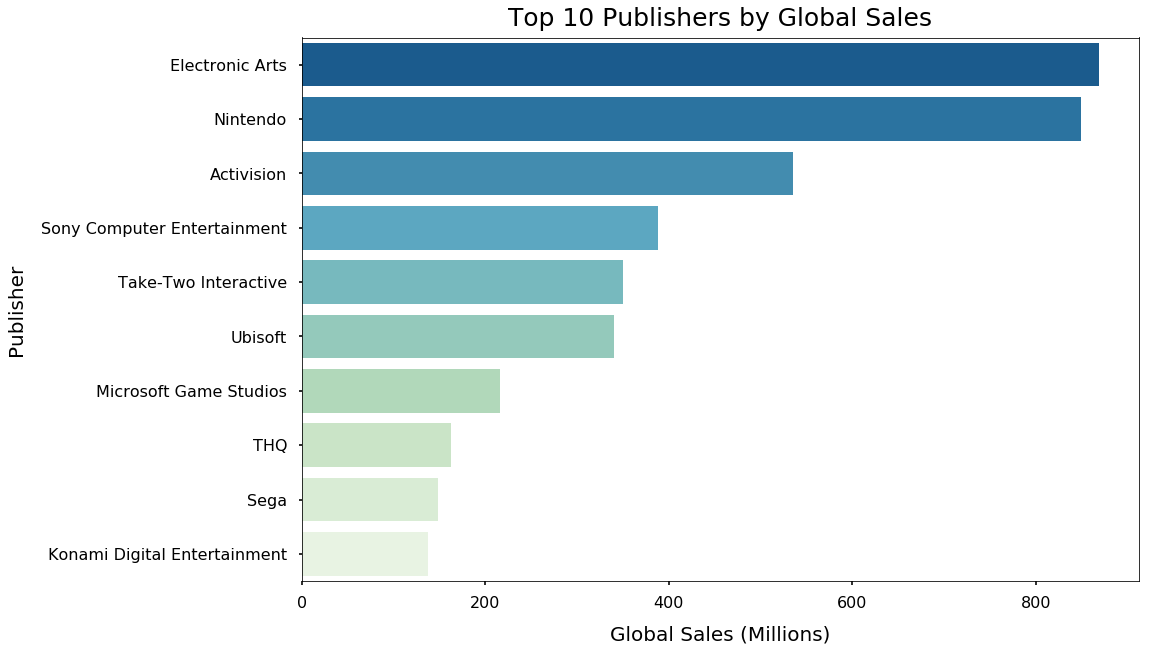

In [16]:
publisher= pd.pivot_table(df_sales,index='Publisher', aggfunc='sum').sort_values(by='Global_Sales', ascending=False).head(10)
publisher.reset_index(level=0, inplace=True)
fig, ax=plt.subplots(figsize=[15,10])
sns.barplot(x ='Global_Sales', y = 'Publisher', data = publisher,palette="GnBu_r")
plt.title("Top 10 Publishers by Global Sales", fontsize=25, y=1.01)
plt.ylabel("Publisher", fontsize=20, labelpad=15)
plt.xlabel("Global Sales (Millions)", fontsize=20, labelpad=15)

These are the top selling publishers in terms of global sales.

## Question 5: Do the the scores of games from the critics correlate with the users? Are critics being payed off?

### Create dataframe with the top selling publishers

In [29]:
df_top_pub= df_sales.loc[df_sales['Publisher'].isin(publisher['Publisher'])]

### Create dataframe with critic and user information correlated with the user scores of each publisher

In [36]:
df_corr=df_top_pub.groupby('Publisher')['Critic_Count','Critic_Score', 'Global_Sales', 'User_Count', 'User_Score'].corr()

### Move publishers out of the index

In [38]:
df_corr.reset_index(level=[0,1],inplace=True)

### Select the user scores correlations rows

In [39]:
df_corr=df_corr[df_corr['level_1']=='User_Score']

### Drop the all other columns

In [55]:
df_heat=df_corr.drop(['Global_Sales', 'level_1','Critic_Count', 'User_Score', 'User_Count' ], axis=1)
df_heat.sort_values(by='Critic_Score', ascending=False, inplace=True)

(0.3, 0.7124765267093282)

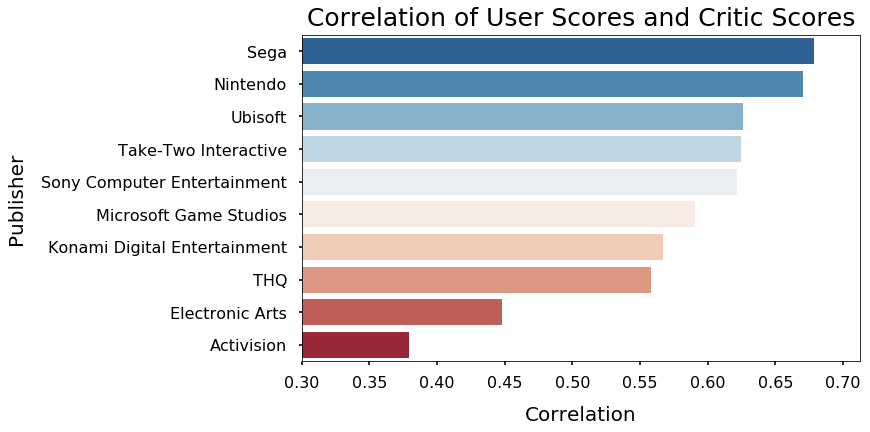

In [119]:
fig, ax = plt.subplots(figsize=(10,6))
s=sns.barplot(x ='Critic_Score', y = 'Publisher', data = df_heat, palette="RdBu_r")
plt.title("Correlation of User Scores and Critic Scores", fontsize=25, y=1.01)
plt.ylabel("Publisher", fontsize=20, labelpad=15);
plt.xlabel("Correlation", fontsize=20, labelpad=15);
plt.xlim(.3, None)

## Insights
1. From this bar chart it seems like some publishers do pay for good reviews from critics. Activision looks like the most the publisher that does it the most. 
1. Sega has the heighest correlation for its games. Maybe they practice paying for reviews the least?
1. Most publishers in this list have high correlations so maybe paying for reviews is not such a common tactic.


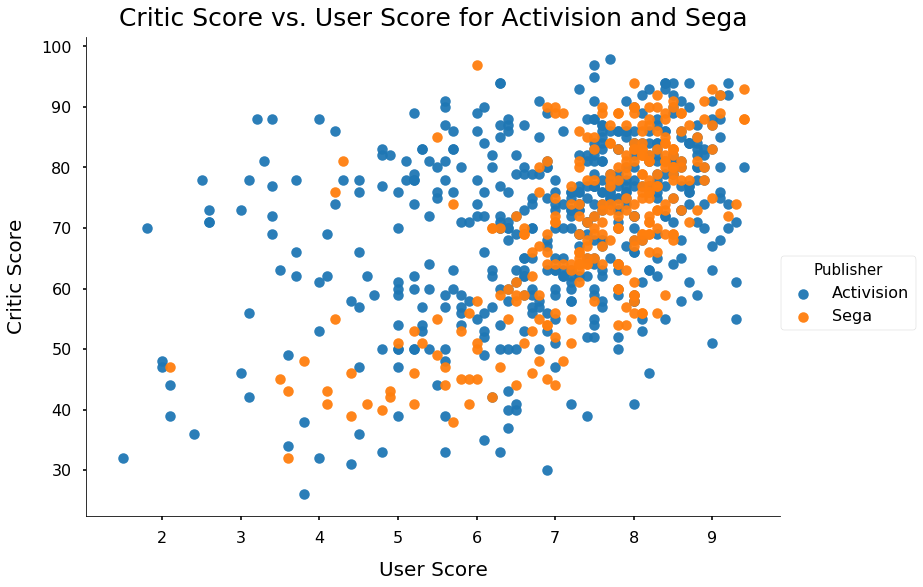

In [116]:
sns.lmplot( x="User_Score", y="Critic_Score", 
           data=df_sales[(df_sales['Publisher']=='Activision')|(df_sales['Publisher']=='Sega')]
           , fit_reg=False, hue='Publisher', legend=True,size=8, aspect = 1.4, scatter_kws={"marker": "D", # Set marker style
                        "s": 110, "alpha":.95})
plt.title("Critic Score vs. User Score for Activision and Sega", fontsize=25, y=1.01)
plt.xlabel("User Score", fontsize=20, labelpad=15)
plt.ylabel("Critic Score", fontsize=20, labelpad=15);

## Insights
1. This scatter plot confirms our findings. Sega has a much more consistent pattern that is more in line with what we expect to find. Critics and users move together and are highly correlated.
1. On the other hand, Activision's plot is much more scattered with many points where critics give a good score but users give a bad one. This seems to suggest that Activision does engage in paying for review points. 
    1. The opposite almost never happens. When users give a game a good score reviewers also give it one. 

## Question 6: How do global sales overall differ over the years?

Text(0,0.5,'Global Sales (Millions)')

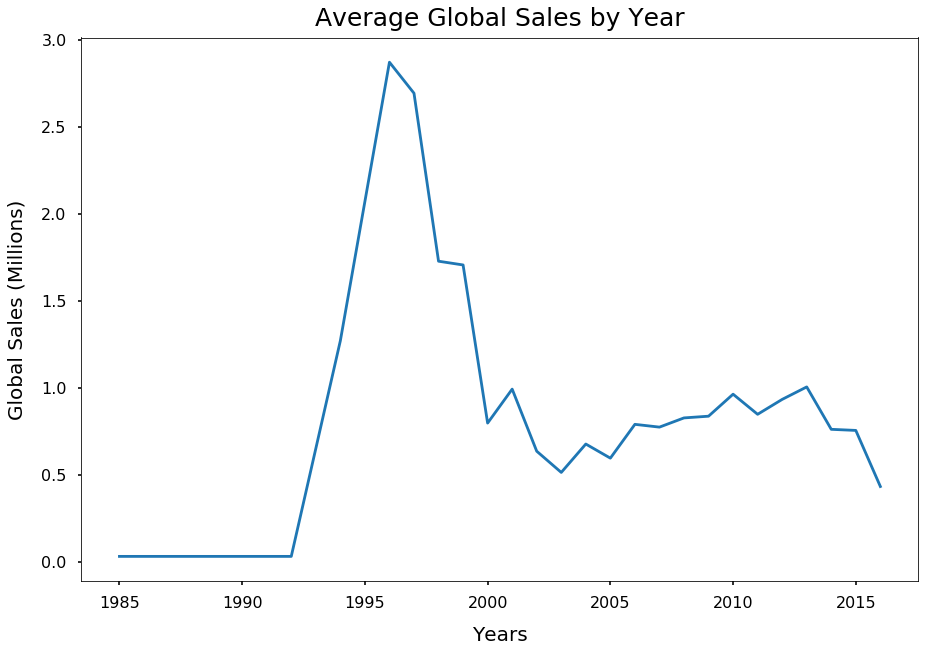

In [27]:
fig, ax=plt.subplots(figsize=[15,10])
years =pd.pivot_table(df_sales,index=['Year_of_Release'], aggfunc='mean')
years.reset_index(level=[0], inplace=True)
plt.plot('Year_of_Release', 'Global_Sales', data=years )
plt.title("Average Global Sales by Year", fontsize=25, y=1.01)
plt.xlabel("Years", fontsize=20, labelpad=15)
plt.ylabel("Global Sales (Millions)", fontsize=20, labelpad=15)

### Insight
1. Before 1993 the average global sales of video games was low.
1. In 1996 there was a huge spike in the average global sales of video games.
    1. By the 2000's the sales have fallen below 1 million average sales.
    1. The average has since then fell and is now looking to drop below half a million on average. This may be due to the increased ease and quantity of games being produced.

Text(0,0.5,'Global Sales (Millions)')

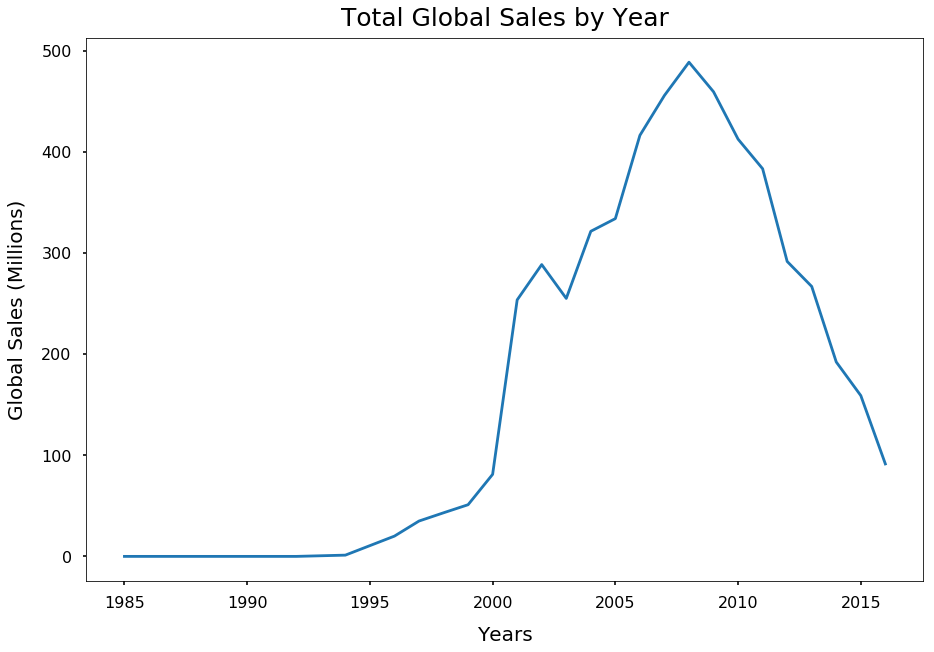

In [28]:
fig, ax=plt.subplots(figsize=[15,10])
years =pd.pivot_table(df_sales,index=['Year_of_Release'], aggfunc='sum')
years.reset_index(level=[0], inplace=True)
plt.plot('Year_of_Release', 'Global_Sales', data=years )
plt.title("Total Global Sales by Year", fontsize=25, y=1.01)
plt.xlabel("Years", fontsize=20, labelpad=15)
plt.ylabel("Global Sales (Millions)", fontsize=20, labelpad=15)

## Insights
1. The total sales of games peaks around 2008 and begins decreasing sharply towards the present.
    1. In contrast to the previous graph this one shows that after 2000 the total sales has a sharp increase, while the average stays in a relatively similar spot.
    1. Compared to the previous graph this reveals that there are infact many more games being sold while the average game is has fewer sales.
1. The sales at 1996 also show that even though there was a huge spike in average sales the total sales was still small compared to after the 2000's